# An analysis of citation of CHIIR papers

We look at citations of papers published at CHIIR in the period 2016-2022.

Questions:
- How often are CHIIR papers cited over time?
- How are the number of citations related to the research type and methods of a paper?
- How are the number of citations related to the research foci of a paper?
- How are the number of citations related to sharing and reuse of IIR resources?

In [1]:
import json

import seaborn as sns
import pandas as pd

# Set a readable theme
sns.set_theme(style="whitegrid", palette="colorblind")


In [2]:
# load the data, show what it looks like
data_file = '../data/codes/all-data.one-hot.xlsx'

df = pd.read_excel(data_file)
df.head(2)

,Conference,Year,Reference string,Type,Award,IIR study paper?,Notes,Reference author_string,Reference title_string,DOI,...,user_issue_trust,user_issue_memory,user_issue_information_behavior,user_issue_distraction,user_issue_user_behavior,user_issue_serendipity,user_group_disabilities,user_group_children,user_group_older_people,user_group_LGBTQ+
0,CHIIR,2016,"Hugo C. Huurdeman, Max L. Wilson, and Jaap Kam...",NaN,NaN,NaN,NaN,"Hugo C. Huurdeman, Max L. Wilson, and Jaap Kamps.",Active and Passive Utility of Search Interface...,10.1145/2854946.2854957,...,0,0,0,0,0,0,0,0,0,0
1,CHIIR,2016,"Tuan A. Tran, Sven Schwarz, Claudia NiederÃ©e,...",NaN,NaN,NaN,NaN,"Tuan A. Tran, Sven Schwarz, Claudia NiederÃ©e,...",The Forgotten Needle in My Collections: Task-A...,10.1145/2854946.2854971,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# select the share and reuse columns
share_cols = [col for col in df.columns if col.endswith('_share')]
reuse_cols = [col for col in df.columns if col.endswith('_re-use')]
share_cols, reuse_cols

(['data_share', 'design_share', 'infrastructure_share'],
 ['data_re-use', 'design_re-use', 'infrastructure_re-use'])

In [4]:
# create a dataframe focused on share and reuse
share_reuse = df[['DOI', 'Year'] + share_cols + reuse_cols]
share_reuse

,DOI,Year,data_share,design_share,infrastructure_share,data_re-use,design_re-use,infrastructure_re-use
0,10.1145/2854946.2854957,2016,0,1,1,1,1,0
1,10.1145/2854946.2854971,2016,0,0,0,1,0,0
2,10.1145/2854946.2854966,2016,0,0,0,0,0,0
3,10.1145/2854946.2854963,2016,0,0,0,0,0,0
4,10.1145/2854946.2854977,2016,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
350,10.1145/3498366.3505791,2022,1,0,1,0,1,1
351,10.1145/3498366.3505837,2022,0,0,0,0,0,0
352,10.1145/3498366.3505835,2022,0,0,0,0,0,0
353,10.1145/3498366.3505833,2022,1,0,0,1,0,0


In [5]:
# select the research design type and method columns
design_type_cols = [col for col in df.columns if col.startswith('design_type_')]
design_method_cols = [col for col in df.columns if col.startswith('design_method_')]
design_type_cols, design_method_cols

(['design_type_experimental',
  'design_type_resource_paper',
  'design_type_theoretical'],
 ['design_method_questionnaire',
  'design_method_content_analysis',
  'design_method_interview',
  'design_method_think-aloud',
  'design_method_log_analysis',
  'design_method_user_study',
  'design_method_data_analysis',
  'design_method_controlled_experiment',
  'design_method_data_donation',
  'design_method_evaluation',
  'design_method_crawling',
  'design_method_observation',
  'design_method_literature_review',
  'design_method_eye-tracking',
  'design_method_crowdsourcing',
  'design_method_screen_recording',
  'design_method_simulation',
  'design_method_factor_analysis',
  'design_method_diary_study',
  'design_method_cluster_analysis',
  'design_method_woz',
  'design_method_data_visualization',
  'design_method_network_analysis',
  'design_method_cognitive_work_analysis',
  'design_method_ethnography',
  'design_method_CI',
  'design_method_task_analysis'])

In [6]:
# add columns with binary for paper having a particular main focus
main_foci = [
    'application',
    'document',
    'research',
    'task',
    'user'
]

main_focus_map = {col: col.split('_')[0] for col in df.columns if col.split('_')[0] in main_foci}
main_focus_map

spec_of_main = {main_focus: [] for main_focus in main_foci}
for spec_focus in main_focus_map:
    spec_of_main[main_focus_map[spec_focus]].append(spec_focus)

for main_focus in main_foci:
    df[main_focus] = df[spec_of_main[main_focus]].max(axis=1)


In [7]:
df[main_foci]

,application,document,research,task,user
0,1,1,0,0,0
1,0,0,0,0,0
2,0,1,0,1,0
3,0,0,0,1,0
4,0,0,0,1,1
...,...,...,...,...,...
350,0,1,0,0,0
351,1,1,0,0,0
352,0,0,0,1,0
353,0,1,0,0,0


## Selecting papers with 3 year citation windows

The papers of 2021 and 2022 have no 3-year citation window, so we leave these out of the analysis.

In [8]:
# the 1,2,3 year citation columns
cite_cols = ['1-yr', '2-yr', '3-yr']
cite_df = df[['DOI', 'Year'] + cite_cols].dropna()

print('Number of papers with 3-year citation windows:', len(cite_df))

cite_df.head(2)


Number of papers with 3-year citation windows: 274


,DOI,Year,1-yr,2-yr,3-yr
0,10.1145/2854946.2854957,2016,0,6.0,9.0
1,10.1145/2854946.2854971,2016,2,4.0,7.0


In [9]:
# what is the distribution of citation counts after 3 years?
cite_df['3-yr'].value_counts().sort_index()

0.0     24
1.0     18
2.0     27
3.0     32
4.0     26
5.0     18
6.0     16
7.0     18
8.0     12
9.0     11
10.0     9
11.0    11
12.0     5
13.0     9
14.0     3
15.0     8
16.0     2
17.0     3
18.0     2
19.0     3
20.0     2
21.0     1
22.0     3
23.0     1
24.0     1
27.0     2
31.0     1
39.0     1
40.0     1
51.0     1
54.0     1
64.0     1
74.0     1
Name: 3-yr, dtype: int64

In [10]:
# descriptive statistics of the citation windows
cite_df[cite_cols].describe()

,1-yr,2-yr,3-yr
count,274.000000,274.000000,274.000000
mean,1.131387,4.178832,7.613139
std,1.484067,4.641048,9.161352
min,0.000000,0.000000,0.000000
25%,0.000000,1.000000,2.250000
50%,1.000000,3.000000,5.000000
75%,2.000000,6.000000,10.000000
max,9.000000,31.000000,74.000000


The median number of citations after 1 year is 1, after 2 years it's 3 and after 3 years it's 5.



## The number of citations for papers from different CHIIR conference

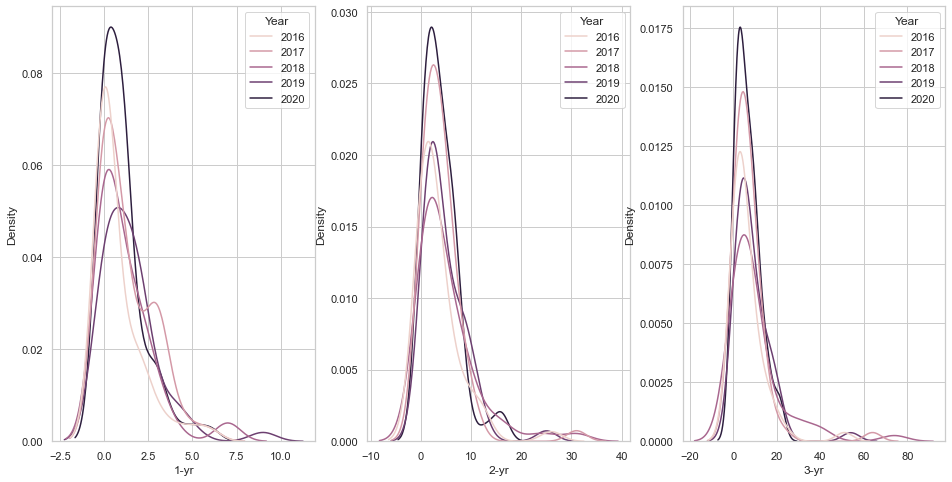

In [11]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,3)
#sns.displot(data=cite_df, x='1-yr');

grid = sns.kdeplot(data=cite_df, x='1-yr', hue='Year', ax=ax[0]);
grid = sns.kdeplot(data=cite_df, x='2-yr', hue='Year', ax=ax[1]);
grid = sns.kdeplot(data=cite_df, x='3-yr', hue='Year', ax=ax[2]);

grid.figure.set_size_inches(16,8)


# Citations and Paper Focus

We turn to the question of the relation between research focus and the number of citations. 

Question:
- How are the number of citations related to the research foci of a paper?


In [12]:
# Create a data frame focused on research foci and citations
# add the dropna to remove papers with no 3-year citation windows
main_cite = df[['DOI', 'Year'] + main_foci + cite_cols].dropna()
main_cite.head(2)

,DOI,Year,application,document,research,task,user,1-yr,2-yr,3-yr
0,10.1145/2854946.2854957,2016,1,1,0,0,0,0,6.0,9.0
1,10.1145/2854946.2854971,2016,0,0,0,0,0,2,4.0,7.0


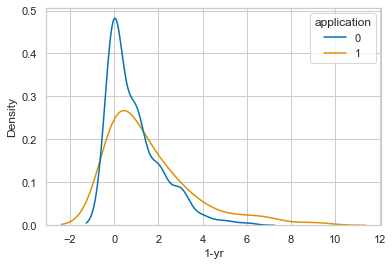

In [13]:
# Are papers focusing on an application-related aspect more likely to get citations than those that do not?
sns.kdeplot(data=main_cite, x='1-yr', hue='application', common_norm=False);

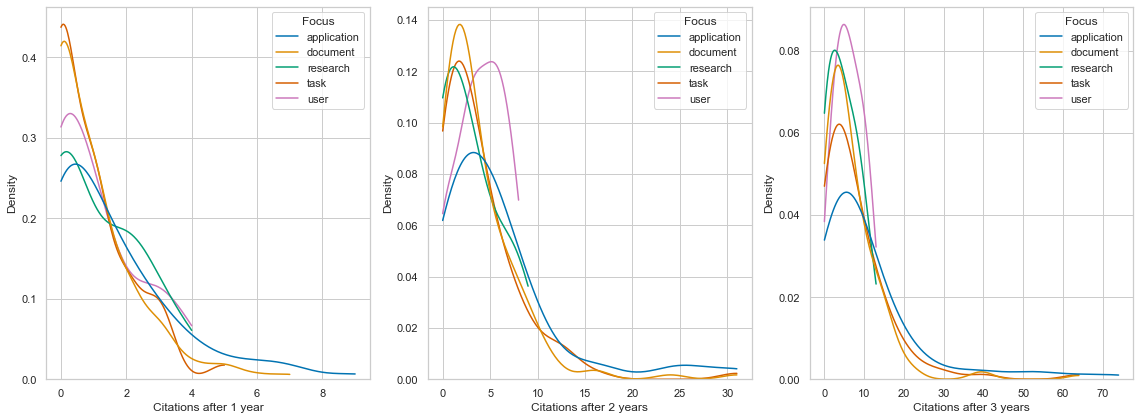

In [14]:
temp_df = main_cite.melt(id_vars=['Year'] + cite_cols, value_vars=main_foci)
temp_df = temp_df.rename(columns={'variable': 'Focus'})

fig, ax = plt.subplots(1,3)

sns.kdeplot(data=temp_df[temp_df.value == 1], x='1-yr', hue='Focus', common_norm=False, cut=0, ax=ax[0]);
sns.kdeplot(data=temp_df[temp_df.value == 1], x='2-yr', hue='Focus', common_norm=False, cut=0, ax=ax[1]);
sns.kdeplot(data=temp_df[temp_df.value == 1], x='3-yr', hue='Focus', common_norm=False, cut=0, ax=ax[2]);

ax[0].set_xlabel('Citations after 1 year');
ax[1].set_xlabel('Citations after 2 years');
ax[2].set_xlabel('Citations after 3 years');

fig.set_size_inches(16,6)
fig.tight_layout()

fig.savefig('../images/citation-focus.kde.png', dpi=300)

There seem to be no user- and research-focused papers with 15 citations or more after three years, while there seem to be several for the other focus areas.

In [17]:
main_cite[main_cite['3-yr'] > 15][main_foci].sum()

application    15
document       10
research        0
task           11
user            0
dtype: int64

How many papers have at least 15 citations

In [18]:
main_cite[main_cite['3-yr'] > 15].DOI.nunique()

27

In [20]:
main_cite[main_cite['3-yr'] > 15][main_foci].sum() / main_cite[main_cite['3-yr'] > 15].DOI.nunique()

application    0.555556
document       0.370370
research       0.000000
task           0.407407
user           0.000000
dtype: float64

There are 27 papers with more than 15 citations after 3 years. Of these, 15 (56%) are focused on an application aspect, 11 (41%) on a task aspect and 10 (37%) on a document aspect. Surprisingly, there are no papers focused on a research aspect or user aspects with more than 15 citations. 

# Citations and Design Type

Question:
- How are the number of citations related to the research type of a paper?


In [21]:
type_cite = df[['DOI', 'Year'] + design_type_cols + cite_cols].dropna()

print('Number of papers in this analysis:', len(type_cite))

type_cite.head(2)

Number of papers in this analysis: 274


,DOI,Year,design_type_experimental,design_type_resource_paper,design_type_theoretical,1-yr,2-yr,3-yr
0,10.1145/2854946.2854957,2016,1,0,0,0,6.0,9.0
1,10.1145/2854946.2854971,2016,1,1,0,2,4.0,7.0


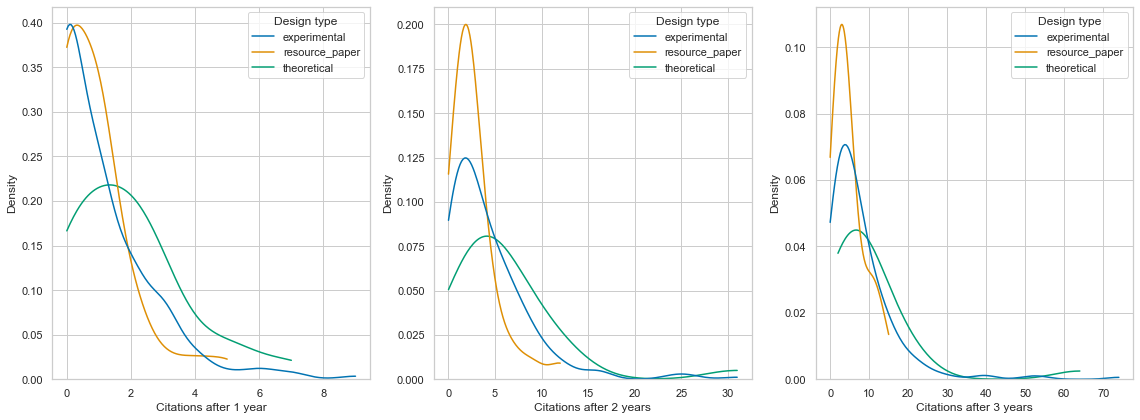

In [22]:
temp_df = type_cite.melt(id_vars=['Year'] + cite_cols, value_vars=design_type_cols)
temp_df['variable'] = temp_df.variable.apply(lambda x: x.replace('design_type_', ''))
temp_df = temp_df.rename(columns={'variable': 'Design type'})

fig, ax = plt.subplots(1,3)

sns.kdeplot(data=temp_df[temp_df.value == 1], x='1-yr', hue='Design type', common_norm=False, cut=0, ax=ax[0]);
sns.kdeplot(data=temp_df[temp_df.value == 1], x='2-yr', hue='Design type', common_norm=False, cut=0, ax=ax[1]);
sns.kdeplot(data=temp_df[temp_df.value == 1], x='3-yr', hue='Design type', common_norm=False, cut=0, ax=ax[2]);

ax[0].set_xlabel('Citations after 1 year');
ax[1].set_xlabel('Citations after 2 years');
ax[2].set_xlabel('Citations after 3 years');

fig.set_size_inches(16,6)
fig.tight_layout()

fig.savefig('../images/citation-type.kde.png', dpi=300)

# Citations and Design Method

Question:
- How are the number of citations related to the research methods of a paper?

In [23]:
df[design_method_cols].sum()

design_method_questionnaire              127
design_method_content_analysis            50
design_method_interview                   47
design_method_think-aloud                 13
design_method_log_analysis                73
design_method_user_study                  70
design_method_data_analysis               21
design_method_controlled_experiment       95
design_method_data_donation                1
design_method_evaluation                  20
design_method_crawling                    12
design_method_observation                 19
design_method_literature_review           16
design_method_eye-tracking                31
design_method_crowdsourcing               25
design_method_screen_recording            10
design_method_simulation                   4
design_method_factor_analysis              3
design_method_diary_study                 12
design_method_cluster_analysis             5
design_method_woz                          5
design_method_data_visualization           1
design_met

There are many research methods, and about half of them are rarely used. For analysis, we focus on the most common ones.

In [24]:
print('Number of research methods:', len(design_method_cols))
s = df[design_method_cols].sum()
method_cols = s[s >= 20].index

print('Number of research methods used in at least 20 papers:', len(method_cols))

Number of research methods: 27
Number of research methods used in at least 20 papers: 10


In [25]:
method_cite = df[['DOI', 'Year'] + list(method_cols) + cite_cols].dropna()
method_cite.head(2)

,DOI,Year,design_method_questionnaire,design_method_content_analysis,design_method_interview,design_method_log_analysis,design_method_user_study,design_method_data_analysis,design_method_controlled_experiment,design_method_evaluation,design_method_eye-tracking,design_method_crowdsourcing,1-yr,2-yr,3-yr
0,10.1145/2854946.2854957,2016,1,0,0,1,0,0,1,0,1,0,0,6.0,9.0
1,10.1145/2854946.2854971,2016,0,0,0,0,1,0,0,0,0,0,2,4.0,7.0


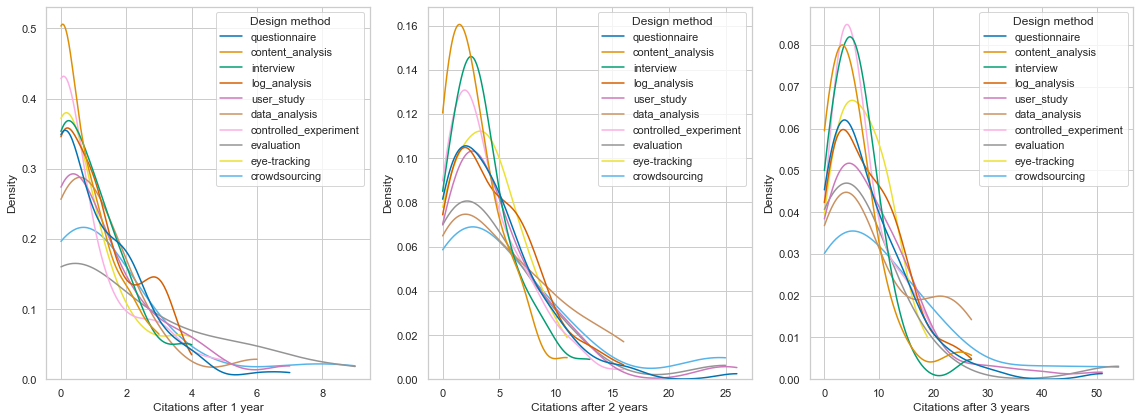

In [26]:
temp_df = method_cite.melt(id_vars=['Year'] + cite_cols, value_vars=method_cols)
temp_df['variable'] = temp_df.variable.apply(lambda x: x.replace('design_method_', ''))
temp_df = temp_df.rename(columns={'variable': 'Design method'})

fig, ax = plt.subplots(1,3)

sns.kdeplot(data=temp_df[temp_df.value == 1], x='1-yr', hue='Design method', common_norm=False, cut=0, ax=ax[0]);
sns.kdeplot(data=temp_df[temp_df.value == 1], x='2-yr', hue='Design method', common_norm=False, cut=0, ax=ax[1]);
sns.kdeplot(data=temp_df[temp_df.value == 1], x='3-yr', hue='Design method', common_norm=False, cut=0, ax=ax[2]);

ax[0].set_xlabel('Citations after 1 year');
ax[1].set_xlabel('Citations after 2 years');
ax[2].set_xlabel('Citations after 3 years');

fig.set_size_inches(16,6)
fig.tight_layout()

fig.savefig('../images/citation-method.kde.png', dpi=300)

# Sharing and citations

Question:
- How are the number of citations related to sharing of IIR resources?

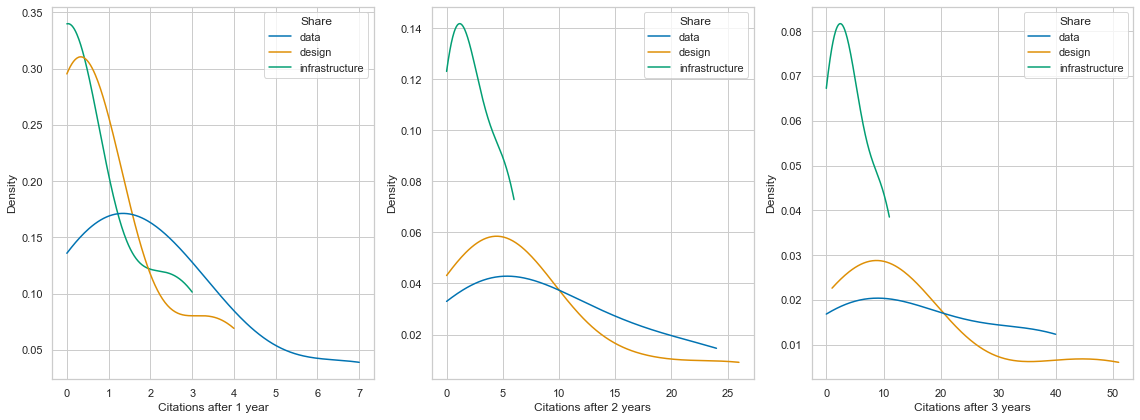

In [27]:
# Create a data frame focused on sharing and citations
share_cite = df[['DOI', 'Year'] + list(share_cols) + cite_cols].dropna()
temp_df = share_cite.melt(id_vars=['Year'] + cite_cols, value_vars=share_cols)
temp_df['variable'] = temp_df.variable.apply(lambda x: x.replace('_share', ''))
variable_name = 'Share'
temp_df = temp_df.rename(columns={'variable': variable_name})

fig, ax = plt.subplots(1,3)

sns.kdeplot(data=temp_df[temp_df.value == 1], x='1-yr', hue=variable_name, common_norm=False, cut=0, ax=ax[0]);
sns.kdeplot(data=temp_df[temp_df.value == 1], x='2-yr', hue=variable_name, common_norm=False, cut=0, ax=ax[1]);
sns.kdeplot(data=temp_df[temp_df.value == 1], x='3-yr', hue=variable_name, common_norm=False, cut=0, ax=ax[2]);

ax[0].set_xlabel('Citations after 1 year');
ax[1].set_xlabel('Citations after 2 years');
ax[2].set_xlabel('Citations after 3 years');

fig.set_size_inches(16,6)
fig.tight_layout()

fig.savefig('../images/citation-share.kde.png', dpi=300)

In [28]:
share_cite = df[['DOI', 'Year'] + list(share_cols) + cite_cols].dropna()
share_cite[share_cite['infrastructure_share'] == 1].dropna()

,DOI,Year,data_share,design_share,infrastructure_share,1-yr,2-yr,3-yr
0,10.1145/2854946.2854957,2016,0,1,1,0,6.0,9.0
50,10.1145/3020165.3020170,2017,0,0,1,3,5.0,11.0
78,10.1145/3020165.3022130,2017,0,0,1,0,0.0,0.0
155,10.1145/3176349.3176892,2018,0,0,1,0,1.0,3.0
182,10.1145/3295750.3298941,2019,0,0,1,2,2.0,3.0
207,10.1145/3295750.3298917,2019,0,0,1,0,3.0,5.0
268,10.1145/3343413.3377940,2020,0,0,1,0,0.0,0.0


# Sharing and citations

Question:
- How are the number of citations related to re-use of IIR resources?

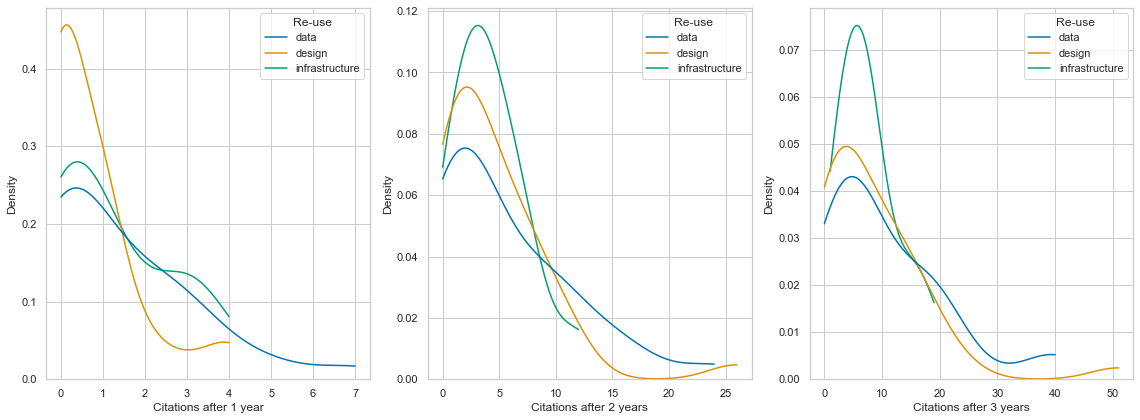

In [29]:
reuse_cite = df[['DOI', 'Year'] + list(reuse_cols) + cite_cols].dropna()
temp_df = reuse_cite.melt(id_vars=['Year'] + cite_cols, value_vars=reuse_cols)
temp_df['variable'] = temp_df.variable.apply(lambda x: x.replace('_re-use', ''))
variable_name = 'Re-use'
temp_df = temp_df.rename(columns={'variable': variable_name})

fig, ax = plt.subplots(1,3)

sns.kdeplot(data=temp_df[temp_df.value == 1], x='1-yr', hue=variable_name, common_norm=False, cut=0, ax=ax[0]);
sns.kdeplot(data=temp_df[temp_df.value == 1], x='2-yr', hue=variable_name, common_norm=False, cut=0, ax=ax[1]);
sns.kdeplot(data=temp_df[temp_df.value == 1], x='3-yr', hue=variable_name, common_norm=False, cut=0, ax=ax[2]);

ax[0].set_xlabel('Citations after 1 year');
ax[1].set_xlabel('Citations after 2 years');
ax[2].set_xlabel('Citations after 3 years');

fig.set_size_inches(16,6)
fig.tight_layout()

fig.savefig('../images/citation-reuse.kde.png', dpi=300)

In [30]:
# How many papers re-use each type of resource
df[reuse_cols].sum()

data_re-use              51
design_re-use            63
infrastructure_re-use    25
dtype: int64

# Collaboration and Citation

Do the papers of highly collaborative authors get more citations than those of authors who have fewer co-authors?

In [31]:
# Use the TSV file with normalised author names
citation_file = '../data/codes/all-data.one-hot.tsv'

author_cleaned_df = pd.read_csv(citation_file, sep='\t')
author_cleaned_df.head(2)

,zotero_ID,DOI,authors,title,year,type,pages,codes,keywords,abstract,...,user_issue_trust,user_issue_memory,user_issue_information_behavior,user_issue_distraction,user_issue_user_behavior,user_issue_serendipity,user_group_disabilities,user_group_children,user_group_older_people,user_group_LGBTQ+
0,52L8KDC2,10.1145/3176349.3176875,"Liu, Jingjing; Li, Yuan",Supporting Information Task Accomplishment: He...,2018,short,253-256,completed; design;method;questionnaire; design...,helpful system features; task accomplishment; ...,We investigated systems and their features tha...,...,0,0,0,0,0,0,0,0,0,0
1,DU9F4HUL,10.1145/3020165.3022130,"Jachja, Tiffany; Douglas, Oard W.",Goal-Directed Information Seeking in Time-Sync...,2017,short,269-272,completed; data;re-use;Apollo program resource...,apollo archive explorer; content linking; time...,We live in an era in which ubiquitous networks...,...,0,0,0,0,0,0,0,0,0,0


In [32]:
def parse_author_string(author_string):
    author_string = author_string.strip('.')
    if ' and ' not in author_string:
        # should be single author
        return author_string
    head, last_author = author_string.split(' and ')
    head_authors = head.strip(',').split(', ')
    return head_authors + [last_author]
    

def parse_author(author_string):
    authors = author_string.strip(';').split('; ')
    return authors
    

# split multiple authors and make a row per author
author_cleaned_df['author'] = author_cleaned_df['authors'].apply(parse_author)
author_df = author_cleaned_df.explode('author')[['DOI', 'year', 'author']]
author_df

,DOI,year,author
0,10.1145/3176349.3176875,2018,"Liu, Jingjing"
0,10.1145/3176349.3176875,2018,"Li, Yuan"
1,10.1145/3020165.3022130,2017,"Jachja, Tiffany"
1,10.1145/3020165.3022130,2017,"Douglas, Oard W."
2,10.1145/3020165.3020178,2017,"Hoeber, Orland"
...,...,...,...
352,10.1145/3020165.3022126,2017,"Fu, Hengyi"
353,10.1145/3020165.3022125,2017,"Inthiran, Anushia"
354,10.1145/3020165.3020171,2017,"Htun, Nyi Nyi"
354,10.1145/3020165.3020171,2017,"Halvey, Martin"


### Regression of number of authors per paper and number of citations

Do papers with more authors get more citations? 

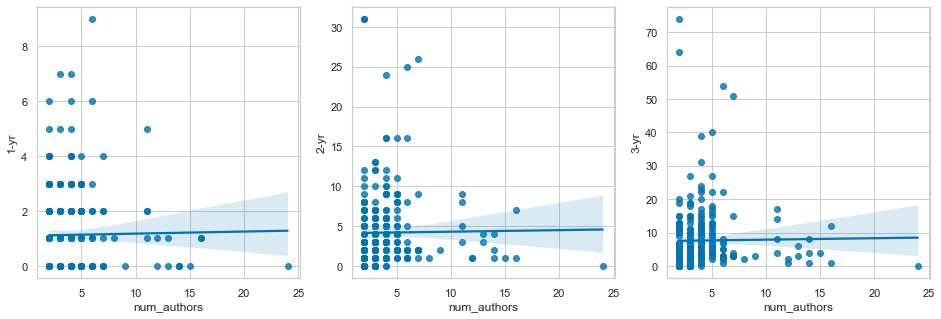

In [33]:
df['num_authors'] = df['Reference author_string'].apply(lambda x: len(parse_author_string(x)))
num_author_cite = df[cite_cols + ['num_authors']].dropna()
num_author_cite

fig, ax = plt.subplots(1, 3)

sns.regplot(data=num_author_cite, x='num_authors', y='1-yr', ax=ax[0]);
sns.regplot(data=num_author_cite, x='num_authors', y='2-yr', ax=ax[1]);
sns.regplot(data=num_author_cite, x='num_authors', y='3-yr', ax=ax[2]);

fig.set_size_inches(16,5)


In [34]:
X = (num_author_cite[['1-yr', 'num_authors']]
    #.pipe(pd.get_dummies, columns=['year'])
    .assign(intercept=1)  # Adds a column called 'intercept' with all values equal to 1.
    .sort_values(by='1-yr')
    .reset_index(drop=True)
)

y = X.pop("1-yr")
y
X
#author_df.groupby(['year'])[["DOI"]].value_counts().reset_index(name='num_authors').drop('DOI', axis=1).pipe(pd.get_dummies, columns=['year']).assign(intercept=1)

,num_authors,intercept
0,3,1
1,3,1
2,3,1
3,2,1
4,4,1
...,...,...
269,2,1
270,6,1
271,3,1
272,4,1


In [35]:
import statsmodels.api as sm
import numpy as np

model_no_indicators = sm.GLM(
    y,
    X["intercept"],
    offset=np.log(X["num_authors"]),
    family=sm.families.Poisson(),
)
result_no_indicators = model_no_indicators.fit()
print(result_no_indicators.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   1-yr   No. Observations:                  274
Model:                            GLM   Df Residuals:                      273
Model Family:                 Poisson   Df Model:                            0
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -466.62
Date:                Tue, 25 Oct 2022   Deviance:                       561.43
Time:                        12:56:35   Pearson chi2:                     685.
No. Iterations:                     5   Pseudo R-squ. (CS):              0.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.2592      0.057    -22.170      0.0

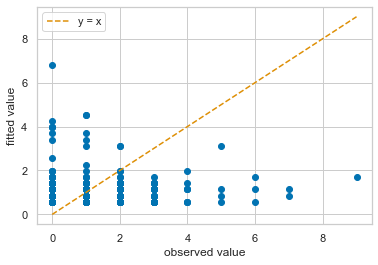

In [36]:
plt.plot(y, result_no_indicators.fittedvalues, 'o')
plt.plot(y, y, '--', label='y = x')
plt.ylabel("fitted value")
plt.xlabel("observed value")
plt.legend()
plt.show()

## Number of co-authors and number of citations per paper

In [37]:
doi_author = pd.get_dummies(data=author_df[['DOI', 'author']], columns=['author'], prefix='', prefix_sep='')
doi_author = doi_author.groupby('DOI').sum()
author_cooc = doi_author.T.dot(doi_author)
author_cooc

,"Abbas, Fakhri","Abela, Charlie","Abualsaud, Mustafa","Agichtein, Eugene","Ahmadvand, Ali","Ai, Qingyao","Aigner, Johannes","Aker, Ahmet","Al-Doulat, Ahmad","Al-Harbi, Aiman L.",...,"den Hengst, Floris","ter Hoeve, Maartje","van Gennip, Doménique","van Gerwen, Emile","van Ossenbruggen, Jacco","van Zeelt, Mickey","van den Bosch, Antal","van den Hoven, Elise","van der Vaart, Merel","von Hoyer, Johannes"
"Abbas, Fakhri",1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Abela, Charlie",0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Abualsaud, Mustafa",0,0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Agichtein, Eugene",0,0,0,6,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Ahmadvand, Ali",0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"van Zeelt, Mickey",0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
"van den Bosch, Antal",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
"van den Hoven, Elise",0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
"van der Vaart, Merel",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [38]:
collab_cite = author_cooc.sum().to_frame(name='num_coauthors')
collab_cite['num_papers'] = author_df.author.value_counts()
author_cite = pd.merge(author_df, cite_df, on='DOI').groupby('author')[['1-yr', '2-yr', '3-yr']].sum()
collab_cite = pd.concat([author_cite, collab_cite], axis=1, join='inner')
collab_cite


,1-yr,2-yr,3-yr,num_coauthors,num_papers
"Abbas, Fakhri",1,1.0,1.0,2,1
"Abela, Charlie",0,1.0,1.0,2,1
"Abualsaud, Mustafa",0,3.0,5.0,8,3
"Agichtein, Eugene",4,20.0,31.0,18,6
"Ahmadvand, Ali",0,2.0,2.0,3,1
...,...,...,...,...,...
"van Zeelt, Mickey",0,1.0,1.0,3,1
"van den Bosch, Antal",1,4.0,7.0,4,1
"van den Hoven, Elise",0,2.0,5.0,6,1
"van der Vaart, Merel",0,4.0,10.0,4,1


Is the number of papers per author related to the number of citations per author?
(Yes, of course!)

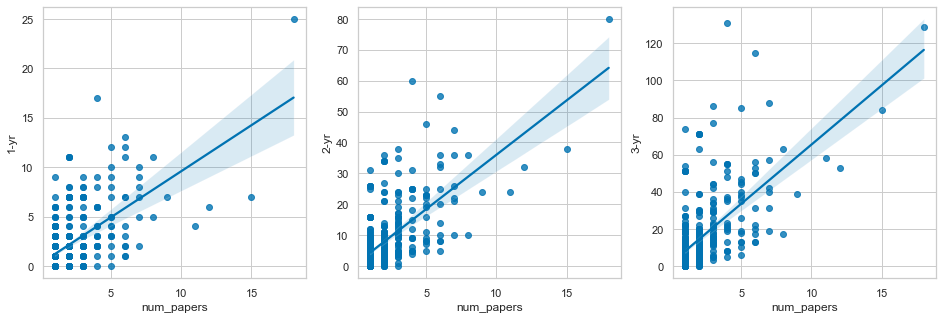

In [39]:
fig, ax = plt.subplots(1, 3)

sns.regplot(data=collab_cite, x='num_papers', y='1-yr', ax=ax[0]);
sns.regplot(data=collab_cite, x='num_papers', y='2-yr', ax=ax[1]);
sns.regplot(data=collab_cite, x='num_papers', y='3-yr', ax=ax[2]);

fig.set_size_inches(16,5)


Is the number of co-authors per author related to the number of citations per author?
(Yes, of course, the number of co-authors tends to be higher as people publish more papers!)

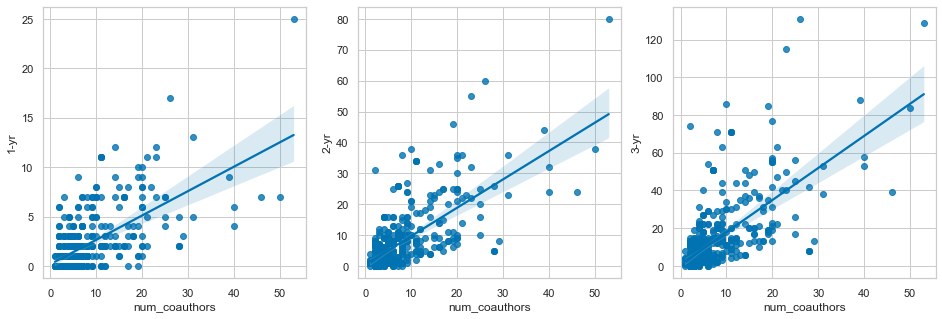

In [40]:
fig, ax = plt.subplots(1, 3)

sns.regplot(data=collab_cite, x='num_coauthors', y='1-yr', ax=ax[0]);
sns.regplot(data=collab_cite, x='num_coauthors', y='2-yr', ax=ax[1]);
sns.regplot(data=collab_cite, x='num_coauthors', y='3-yr', ax=ax[2]);

fig.set_size_inches(16,5)


In [41]:
for i in range(1, 4):
    cite_col = f'{i}-yr'
    cite_per_paper_col = f'{i}-yr-paper'
    collab_cite[cite_per_paper_col] = collab_cite[cite_col] / collab_cite['num_papers']
    
collab_cite

,1-yr,2-yr,3-yr,num_coauthors,num_papers,1-yr-paper,2-yr-paper,3-yr-paper
"Abbas, Fakhri",1,1.0,1.0,2,1,1.000000,1.000000,1.000000
"Abela, Charlie",0,1.0,1.0,2,1,0.000000,1.000000,1.000000
"Abualsaud, Mustafa",0,3.0,5.0,8,3,0.000000,1.000000,1.666667
"Agichtein, Eugene",4,20.0,31.0,18,6,0.666667,3.333333,5.166667
"Ahmadvand, Ali",0,2.0,2.0,3,1,0.000000,2.000000,2.000000
...,...,...,...,...,...,...,...,...
"van Zeelt, Mickey",0,1.0,1.0,3,1,0.000000,1.000000,1.000000
"van den Bosch, Antal",1,4.0,7.0,4,1,1.000000,4.000000,7.000000
"van den Hoven, Elise",0,2.0,5.0,6,1,0.000000,2.000000,5.000000
"van der Vaart, Merel",0,4.0,10.0,4,1,0.000000,4.000000,10.000000


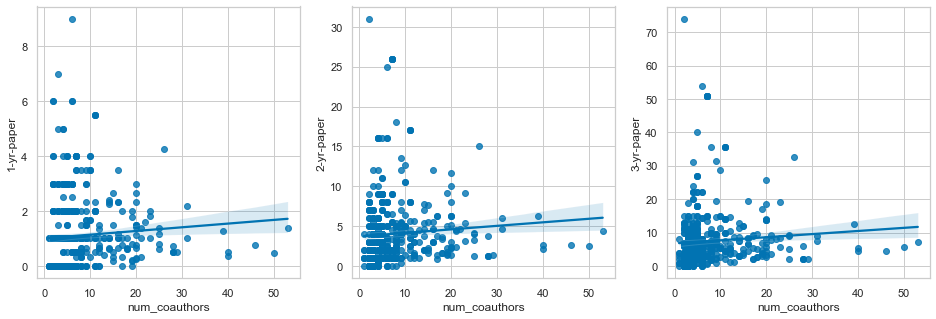

In [42]:
fig, ax = plt.subplots(1, 3)

sns.regplot(data=collab_cite, x='num_coauthors', y='1-yr-paper', ax=ax[0]);
sns.regplot(data=collab_cite, x='num_coauthors', y='2-yr-paper', ax=ax[1]);
sns.regplot(data=collab_cite, x='num_coauthors', y='3-yr-paper', ax=ax[2]);

fig.set_size_inches(16,5)


In [43]:
kamps_doi = author_df[author_df.author.str.contains('Kamps')].DOI
huurdeman_doi = author_df[author_df.author.str.contains('Huurdeman')].DOI
author_df[author_df.DOI.isin(kamps_doi)]
author_df[author_df.DOI.isin(huurdeman_doi)]


,DOI,year,author
72,10.1145/2854946.2854957,2016,"Huurdeman, Hugo"
72,10.1145/2854946.2854957,2016,"Wilson, Max L."
72,10.1145/2854946.2854957,2016,"Kamps, Jaap"
182,10.1145/3343413.3377994,2020,"Huurdeman, Hugo"
182,10.1145/3343413.3377994,2020,"Piccoli, Chiara"
223,10.1145/3295750.3298918,2019,"Melgar-Estrada, Liliana"
223,10.1145/3295750.3298918,2019,"Koolen, Marijn"
223,10.1145/3295750.3298918,2019,"Beelen, Kaspar"
223,10.1145/3295750.3298918,2019,"Huurdeman, Hugo"
223,10.1145/3295750.3298918,2019,"Wigham, Mari"
